<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Для исследования предоставлены данные компании "Цифра", занимающейся разрабатыванием решений для эффективной работы промышленных предприятий.

Данные находятся в трёх файлах:
* `gold_recovery_train_new.csv` — обучающая выборка;
* `gold_recovery_test_new.csv` — тестовая выборка;  
* `gold_recovery_full_new.csv` — исходные данные.

Для индексации данных используется признак date.

В тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей так как некоторые параметры в частности перед финальной очисткой рассчитываются значительно позже. Данные поступили в сыром виде, их просто выгрузили из хранилища, перед построением модели проверим данные на корректность.

Цель исследования подготовить модель машинного обучения для компании.Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Этапы работы над проектом:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

Загрузим данные в программу и изучим их.

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

#df_train.info()
df_test.info()
df_test.head()
#df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


В некоторых столбцах есть пропущенные значения, столбец даты имеет некорректный тип данных.

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке (df_train) для признака (rougher.output.recovery). Так же найдём MAE между расчётами и значением признака.

Формула для вычисления обогащения:

$$Recovery = \frac{C *(F - T)}{F * (C - T)} * 100$$

где:
* `С` — доля золота в концентрате после флотации/очистки;
* `F` — доля золота в сырье/концентрате до флотации/очистки;  
* `T` — доля золота в отвальных хвостах после флотации/очистки.

In [3]:
def recovery(df, name, c, f, t):
    df[name] = (c * (f - t)) / (f * (c - t)) * 100
    
c_rougher = df_train['rougher.output.concentrate_au']
f_rougher = df_train['rougher.input.feed_au']
t_rougher = df_train['rougher.output.tail_au']

c_final = df_train['final.output.concentrate_au']
f_final = df_train['rougher.input.feed_au']
t_final = df_train['final.output.tail_au']

df_train_recovery_rougher = df_train.copy()
df_train_recovery_final = df_train.copy()

recovery(df_train_recovery_rougher, 'recovery_rougher', c_rougher, f_rougher, t_rougher)
recovery(df_train_recovery_final, 'recovery_final', c_final, f_final, t_final)

print('MAE для рассчитаной эффективности и значением признака (rougher):')
print(mean_absolute_error(df_train['rougher.output.recovery'], df_train_recovery_rougher['recovery_rougher']), '\n')

print('MAE для рассчитаной эффективности и значением признака (final):')
print(mean_absolute_error(df_train['final.output.recovery'], df_train_recovery_final['recovery_final']))

MAE для рассчитаной эффективности и значением признака (rougher):
9.73512347450521e-15 

MAE для рассчитаной эффективности и значением признака (final):
8.538049763979541e-15


Значение MAE близко к нулю, что говорит о том что рассчитанное значение практически идентично табличному.

Проанализируем признаки недоступные в тестовой выборке.

In [4]:
#получим названия признаков которые есть в обучающей выборке, но нет в тестовой
not_in_test = set(df_train.columns) - set(df_test.columns)      
        
display(not_in_test, len(not_in_test))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

34

* `final.output.concentrate_ag (_pd, _sol, _au), final.output.tail_ag (_pb, _sol, _au)` — конечный результат;
* `primary_cleaner.output.concentrate_ag (_pb, _sol, _au), primary_cleaner.output.tail_ag (_pb, _sol, _au)` -продукт на этапе первой очистки;
* `rougher.calculation.sulfate_to_au_concentrate, rougher.calculation.floatbank10_sulfate_to_au_feed (floatbank11), rougher.calculation.au_pb_ratio` - расчетные характеристики флотации;  
* `rougher.output.concentrate_ag (_pb, _sol, _au), rougher.output.tail_ag (_pb, _sol, _au)` - продукт на этапе флотации; 
* `secondary_cleaner.output.tail_ag (_pb, _sol, _au)` - продукт на этапе второй очитски;
* `final.output.recovery, rougher.output.recovery` - целевые признаки.  

Проведём предобработку дынных перед анализом.

Уберём столбец date из тренировочной и тестовой выборки, сделаем его индексом датафрейма.

In [5]:
df_train = df_train.set_index('date')
df_test = df_test.set_index('date')
df_full = df_full.set_index('date')

display(df_train.head())
#display(df_test.head())
#display(df_full.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Заполним пропущенные значения во всех датафреймах, пропуски можно заменить средним значением столбцов так как их кол-во по сравнению с объёмами датафреймов небольшой.

In [6]:
def find_pass(df):
    for elem in df:
        if df[elem].isnull().sum() != 0:
            print(df[elem].isnull().sum() / len(df) * 100, elem)
        else:
            continue

find_pass(df_train)
#find_pass(df_test)
#find_pass(df_full)

0.007067637288854336 final.output.concentrate_ag
0.007067637288854336 final.output.concentrate_pb
1.491271467948265 final.output.concentrate_sol
0.7067637288854336 final.output.tail_pb
0.035338186444271676 final.output.tail_sol
0.1413527457770867 primary_cleaner.input.sulfate
0.22616439324333876 primary_cleaner.input.depressant
0.7067637288854336 primary_cleaner.input.xanthate
0.6078168068414729 primary_cleaner.output.concentrate_pb
2.02134426461234 primary_cleaner.output.concentrate_sol
0.007067637288854336 primary_cleaner.output.tail_ag
0.10601455933281505 primary_cleaner.output.tail_pb
0.3251113152872995 primary_cleaner.output.tail_sol
0.028270549155417345 primary_cleaner.state.floatbank8_a_air
0.007067637288854336 primary_cleaner.state.floatbank8_a_level
0.028270549155417345 primary_cleaner.state.floatbank8_b_air
0.007067637288854336 primary_cleaner.state.floatbank8_b_level
0.014135274577708672 primary_cleaner.state.floatbank8_c_air
0.007067637288854336 primary_cleaner.state.floatb

Рассмотрим распределние значений в столбце secondary_cleaner.output.tail_sol.

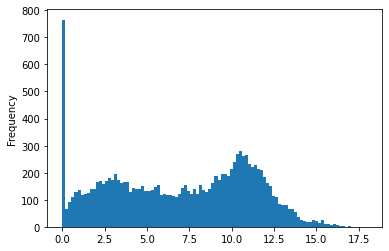

In [7]:
df_train['secondary_cleaner.output.tail_sol'].plot(kind = 'hist', bins = 100)
plt.show()

Заполним пропуски и нули на соседние значения.

Количество пропусков в столбце secondary_cleaner.output.tail_sol (df_train):
0.0 

Количество пропусков в столбце secondary_cleaner.output.tail_sol (df_train):
0.0


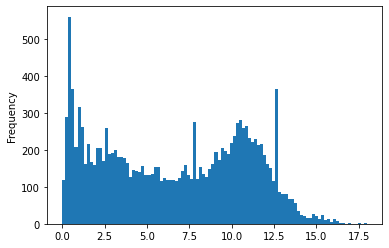

In [8]:

def filling_gaps_nearby(df):
    for i in range(0, len(df) - 1):
        if np.isnan(df['secondary_cleaner.output.tail_sol'][i]) == True or df['secondary_cleaner.output.tail_sol'][i] == 0:
            if i == 0:
                df['secondary_cleaner.output.tail_sol'][i] = df['secondary_cleaner.output.tail_sol'][i + 1]
            else:
                df['secondary_cleaner.output.tail_sol'][i] = df['secondary_cleaner.output.tail_sol'][i - 1]
        else:
            continue

filling_gaps_nearby(df_train)
filling_gaps_nearby(df_full)
            
print('Количество пропусков в столбце secondary_cleaner.output.tail_sol (df_train):')
print(df_train['secondary_cleaner.output.tail_sol'].isnull().sum() / len(df_train) * 100, '\n')

print('Количество пропусков в столбце secondary_cleaner.output.tail_sol (df_train):')
print(df_full['secondary_cleaner.output.tail_sol'].isnull().sum() / len(df_full) * 100)

df_train['secondary_cleaner.output.tail_sol'].plot(kind = 'hist', bins = 100)
plt.show()

В оставшихся столбцах где присутствуют пропущенные значения можно заполнить средним, так как кол-во пропусков минимально.

In [9]:
def filling_gaps(df):
    for elem in df:
        if df[elem].isnull().sum() != 0:
            df[elem] = df[elem].fillna(df[elem].mean())
        else:
            continue

filling_gaps(df_train)
filling_gaps(df_test)
filling_gaps(df_full)

print('Кол-во пропущенных значений в df_train:', df_train.isnull().sum().sum())
print('Кол-во пропущенных значений в df_test:', df_test.isnull().sum().sum())
print('Кол-во пропущенных значений в df_full:', df_full.isnull().sum().sum())

Кол-во пропущенных значений в df_train: 0
Кол-во пропущенных значений в df_test: 0
Кол-во пропущенных значений в df_full: 0


In [10]:
display(df_full.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19439 non-null  float64
 1   final.output.concentrate_pb                         19439 non-null  float64
 2   final.output.concentrate_sol                        19439 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19439 non-null  float64
 6   final.output.tail_pb                                19439 non-null  float64
 7   final.output.tail_sol                               19439 non-null  float64
 8   final.output.tail_au                             

None

## Анализ данных

Посторим графики изменения количества элементов в смеси золотоносной руды в процессе её обработки.

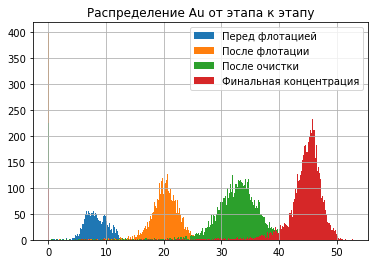

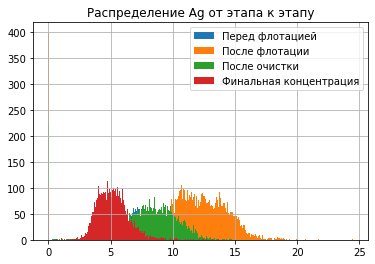

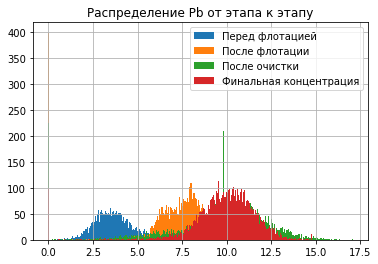

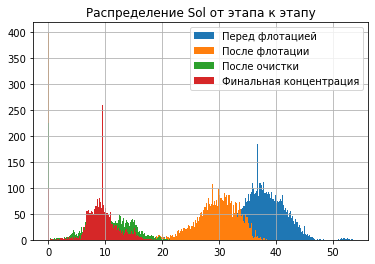

CPU times: user 31.5 s, sys: 239 ms, total: 31.7 s
Wall time: 31.7 s


"\nplt.figure(figsize=(10, 5))\nplt.plot(stages, au_mean, label = 'Кол-во золота Au')\nplt.plot(stages, ag_mean, label = 'Кол-во серебра Ag')\nplt.plot(stages, pb_mean, label = 'Кол-во свинца Pb')\nplt.plot(stages, sol_mean, label = 'Кол-во Sol')\nplt.legend()\nplt.title('Количество элементов на этапах обработки')\nplt.grid()\nplt.show()\n"

In [11]:
%%time

stages = ['Перед флотацией', 'После флотации', 'После очистки', 'Финальная концентрация']

au = [df_full['rougher.input.feed_au'], df_full['rougher.output.concentrate_au'], 
      df_full['primary_cleaner.output.concentrate_au'], df_full['final.output.concentrate_au']]
ag = [df_full['rougher.input.feed_ag'], df_full['rougher.output.concentrate_ag'], 
      df_full['primary_cleaner.output.concentrate_ag'], df_full['final.output.concentrate_ag']]
pb = [df_full['rougher.input.feed_pb'], df_full['rougher.output.concentrate_pb'], 
      df_full['primary_cleaner.output.concentrate_pb'], df_full['final.output.concentrate_pb']]
sol = [df_full['rougher.input.feed_sol'], df_full['rougher.output.concentrate_sol'], 
        df_full['primary_cleaner.output.concentrate_sol'], df_full['final.output.concentrate_sol']]
           
def plot_metals(metal, name_metal):
    metal[0].hist(bins = 1000, label = 'Перед флотацией')
    metal[1].hist(bins = 1000, label = 'После флотации')
    metal[2].hist(bins = 1000, label = 'После очистки')
    metal[3].hist(bins = 1000, label = 'Финальная концентрация')
    plt.title(name_metal)
    plt.legend()
    plt.show()

plot_metals(au, 'Распределение Au от этапа к этапу')
plot_metals(ag, 'Распределение Ag от этапа к этапу')
plot_metals(pb, 'Распределение Pb от этапа к этапу')
plot_metals(sol,'Распределение Sol от этапа к этапу')
'''
plt.figure(figsize=(10, 5))
plt.plot(stages, au_mean, label = 'Кол-во золота Au')
plt.plot(stages, ag_mean, label = 'Кол-во серебра Ag')
plt.plot(stages, pb_mean, label = 'Кол-во свинца Pb')
plt.plot(stages, sol_mean, label = 'Кол-во Sol')
plt.legend()
plt.title('Количество элементов на этапах обработки')
plt.grid()
plt.show()
'''

Сравним распределение размеров гранул сырь на обучающей и тестовой выборках.

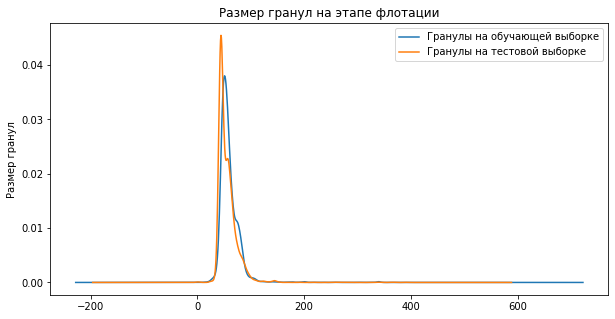

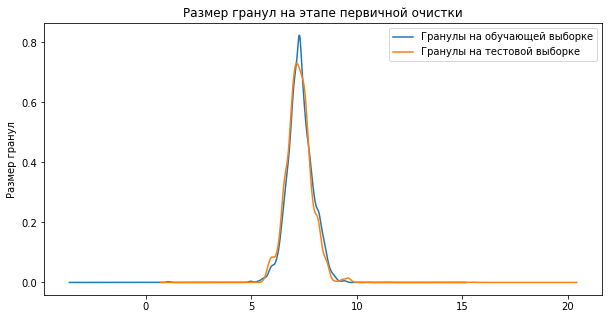

In [12]:
plt.figure(figsize=(10, 5))
df_train['rougher.input.feed_size'].plot.density(label = 'Гранулы на обучающей выборке')
df_test['rougher.input.feed_size'].plot.density(label = 'Гранулы на тестовой выборке')
plt.legend()
plt.title('Размер гранул на этапе флотации')
plt.ylabel('Размер гранул')
plt.show()

plt.figure(figsize=(10, 5))
df_train['primary_cleaner.input.feed_size'].plot.density(label = 'Гранулы на обучающей выборке')
df_test['primary_cleaner.input.feed_size'].plot.density(label = 'Гранулы на тестовой выборке')
plt.legend()
plt.title('Размер гранул на этапе первичной очистки')
plt.ylabel('Размер гранул')
plt.show()

На этапе флотации размер гранул в выборках не сильно отличается, на графиках рспределние величин схоже и на тестовой и на обучающей выборках. Заметна большая разница в кол-ве данных в выборках.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

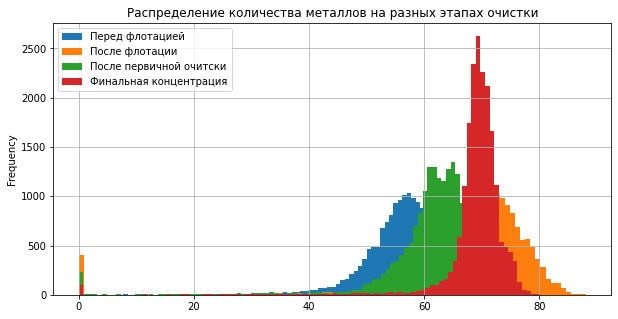

In [13]:
def sum_columns(fist, second, third, fourth):
    sum_result = df_full[[fist, second, third, fourth]].sum(axis = 1)
    return sum_result

rougher_input = sum_columns('rougher.input.feed_au', 'rougher.input.feed_ag', \
                        'rougher.input.feed_sol', 'rougher.input.feed_pb')
rougher_output = sum_columns('rougher.output.concentrate_au', 'rougher.output.concentrate_ag', \
                         'rougher.output.concentrate_sol', 'rougher.output.concentrate_pb')
primary_cleaner = sum_columns('primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', \
                          'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol')
final = sum_columns('final.output.concentrate_au', 'final.output.concentrate_ag', \
                'final.output.concentrate_sol', 'final.output.concentrate_pb')

plt.figure(figsize=(10, 5))
rougher_input.plot(kind = 'hist', bins = 100, label = 'Перед флотацией')
rougher_output.plot(kind = 'hist', bins = 100, label = 'После флотации')
primary_cleaner.plot(kind = 'hist', bins = 100, label = 'После первичной очитски')
final.plot(kind = 'hist', bins = 100, label = 'Финальная концентрация')
plt.grid()
plt.legend()
plt.title('Распределение количества металлов на разных этапах очистки')
plt.show()

На графике присутствуют выбросы у нулевого значения, что говорит о отсутствии элементов, такие значения можно удалить из таблицы. Концентрация металов увеличивается к финальному этапу. Распределение всех металов нормальное.

Уберём около нулевые значения из таблицы.

In [14]:
stages = ['final.output.concentrate_au', 'rougher.input.feed_ag', 'rougher.input.feed_sol',\
          'rougher.input.feed_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',\
          'rougher.output.concentrate_sol', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_au',\
          'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', \
          'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.concentrate_ag',\
          'final.output.concentrate_sol', 'final.output.concentrate_pb']

for elem in stages:
    df_full = df_full[df_full[elem] > 0.1]
    
for elem in stages:
    df_train = df_train[df_train[elem] > 0.1]
    
#print(df_full.info())

Проверим распределние.

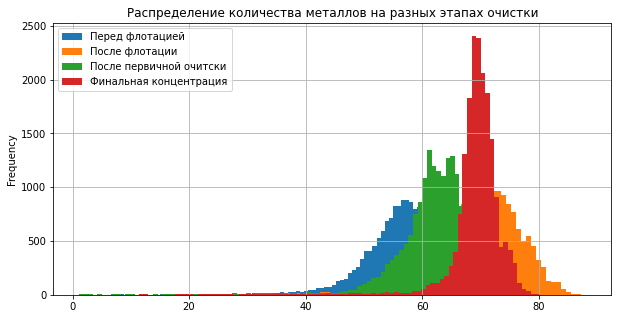

In [15]:
rougher_input_two = sum_columns('rougher.input.feed_au', 'rougher.input.feed_ag', \
                        'rougher.input.feed_sol', 'rougher.input.feed_pb')
rougher_output_two = sum_columns('rougher.output.concentrate_au', 'rougher.output.concentrate_ag', \
                         'rougher.output.concentrate_sol', 'rougher.output.concentrate_pb')
primary_cleaner_two = sum_columns('primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', \
                          'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol')
final_two = sum_columns('final.output.concentrate_au', 'final.output.concentrate_ag', \
                'final.output.concentrate_sol', 'final.output.concentrate_pb')

plt.figure(figsize=(10, 5))
rougher_input_two.plot(kind = 'hist', bins = 100, label = 'Перед флотацией')
rougher_output_two.plot(kind = 'hist', bins = 100, label = 'После флотации')
primary_cleaner_two.plot(kind = 'hist', bins = 100, label = 'После первичной очитски')
final_two.plot(kind = 'hist', bins = 100, label = 'Финальная концентрация')
plt.grid()
plt.legend()
plt.title('Распределение количества металлов на разных этапах очистки')
plt.show()

## Модель

Создадим функцию вычислени метрики качества sMAPE.

sMAPE вычисляется по формуле:

$$ sMAPE = \frac{1}{N} * \sum_{i=1}^{N}\frac{|y_i - \hat{y_i}|}{(|y_i| + |\hat{y_i}|) * 0.5} * 100 \% $$

где:
* $$ y_i $$ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряетс качество;
* $$ \hat{y_i} $$ - значение предсказания для объекта с порядковым номером i, например в тестовой выборке;
* $$ N $$ - количество элементов в выборке.


In [16]:
def smape(target_true, target_prediction):
    n = np.abs(target_true - target_prediction)
    d = (np.abs(target_true) + np.abs(target_prediction)) / 2
    return 1 / len(target_true) * np.sum(n / d) * 100


def final_smape(smape_one, smape_two):
    return 0.25 * smape_one + 0.75 * smape_two

Подговим данные для обучения моделей.

В тестовой выборке отсутствуют целевые признаки rougher.output.recovery и final.output.recovery. Добавим их в тестовую выборку из df_full. Признаки необходимы для расчета иетрики качества.

In [17]:
df_test = df_test.merge(df_full.loc[:, ['rougher.output.recovery','final.output.recovery']], on='date')

delete = not_in_test - set(['rougher.output.recovery','final.output.recovery'])

df_train = df_train.drop(columns = delete, axis = 1)

In [18]:
#создадим выборки признаков и таргетов для rougher используя обучающую выборку 
features_train_rougher = df_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train_rougher = df_train['rougher.output.recovery']

#создадим выборки признаков и таргетов для final используя обучающую выборку
features_train_final = features_train_rougher
target_train_final = df_train['final.output.recovery']

print('features_train_rougher:', features_train_rougher.shape)
print('target_train_rougher:', target_train_rougher.shape, '\n')

print('features_train_final:', features_train_final.shape)
print('target_train_final', target_train_final.shape, '\n')

features_train_rougher: (13597, 52)
target_train_rougher: (13597,) 

features_train_final: (13597, 52)
target_train_final (13597,) 



In [19]:
features_test = df_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']

In [20]:
print('features_test:', features_test.shape)
print('target_test_rougher:', target_test_rougher.shape)
print('target_test_final:', target_test_final.shape)

features_test: (5123, 52)
target_test_rougher: (5123,)
target_test_final: (5123,)


Обучение для rougher.

In [21]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [22]:
%%time 

model_one = LinearRegression()
result_one = cross_val_score(model_one, features_train_rougher, target_train_rougher, scoring = smape_scorer, cv = 5)

result_one_rougher_train = result_one.mean() * (-1)
print('SMAPE:', result_one_rougher_train)

SMAPE: 7.256935763419259
CPU times: user 528 ms, sys: 827 ms, total: 1.35 s
Wall time: 1.29 s


Обучение для final.

In [23]:
model_two = LinearRegression()
result_two = cross_val_score(model_two, features_train_final, target_train_final, scoring = smape_scorer, cv = 5)

result_two_final_train = result_two.mean() * (-1)
print('SMAPE:', result_two_final_train)

SMAPE: 11.297664856062742


Обучение второй модели.

In [24]:
'''
%%time

param_grid = {'n_estimators': range (10, 100, 30),
              'max_depth': range (4,13, 2),}
 
model_4 = RandomForestRegressor(random_state=131296)
search_two = GridSearchCV(model_4, param_grid, cv=5, scoring=smape_scorer)
search_two.fit(features_train_final, target_train_final)
print(-search_two.best_score_)
'''

"\n%%time\n\nparam_grid = {'n_estimators': range (10, 100, 30),\n              'max_depth': range (4,13, 2),}\n \nmodel_4 = RandomForestRegressor(random_state=131296)\nsearch_two = GridSearchCV(model_4, param_grid, cv=5, scoring=smape_scorer)\nsearch_two.fit(features_train_final, target_train_final)\nprint(-search_two.best_score_)\n"

Обучение для rougher.

In [25]:
%%time

state = np.random.RandomState(12345)

model_three = RandomForestRegressor(n_estimators=10, max_depth = 4, random_state=state)
smape_three = cross_val_score(model_three, features_train_rougher, target_train_rougher, scoring = smape_scorer, cv =5)

result_smape_three_rougher = smape_three.mean() * (-1)

print('SMAPE:', result_smape_three_rougher)

SMAPE: 6.6596518345563
CPU times: user 6.61 s, sys: 16.3 ms, total: 6.62 s
Wall time: 6.62 s


Обучение для final.

In [26]:
%%time

state = np.random.RandomState(12345)

model_four = RandomForestRegressor(n_estimators=10, max_depth = 4, random_state=state)
smape_four = cross_val_score(model_four, features_train_final, target_train_final, scoring = smape_scorer, cv =5)

result_smape_four_final = smape_four.mean() * (-1)

print('SMAPE:', result_smape_four_final)

SMAPE: 9.273166237869894
CPU times: user 6.76 s, sys: 12 ms, total: 6.77 s
Wall time: 6.78 s


In [27]:
print('Финальный SMAPE для линеной регресии:', final_smape(result_one_rougher_train, result_two_final_train))
print('Финальный SMAPE для случайного леса:', final_smape(result_smape_three_rougher, result_smape_four_final))

Финальный SMAPE для линеной регресии: 10.287482582901871
Финальный SMAPE для случайного леса: 8.619787637041496


Лучшая модель RandomForestRegressor.

Протестируем модель на тестовой выборке.

In [28]:
model_rougher = RandomForestRegressor(n_estimators = 10, max_depth = 4, random_state = state)
model_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_rougher.predict(features_test)
smape_rougher = smape(target_test_rougher, predicted_rougher)

In [29]:
model_final = RandomForestRegressor(n_estimators = 10, max_depth = 4, random_state = state)
model_final.fit(features_train_final, target_train_final)
predicted_final = model_final.predict(features_test)
smape_final = smape(target_test_final, predicted_final)

In [30]:
smape_all = final_smape(smape_rougher, smape_final)

print(smape_all)

7.447944330052415


Проверим модель на адекватность. Для этого обучим константную модель и сравним метрику с лучшей моделью.

In [31]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = dummy_rougher.predict(features_test)
smape_rougher = smape(target_test_rougher, predicted_rougher)

dummy_final = DummyRegressor(strategy="mean")
dummy_final.fit(features_train_final, target_train_final)
predicted_final = dummy_final.predict(features_test)
smape_final = smape(target_test_final, predicted_final)

final_smape_dummy = final_smape(smape_rougher, smape_final)
print(final_smape_dummy)

7.779503190711726


**Вывод:**


Для подготвки обучения моделей с предоставленными данными были проведены следующие действи: была проверена правильность эффективности обогощаения, для этого посчитали значение MAE между полученными значениями по формуле и значением признака, получил положительный результат. В данных присутствовали незначительные пропуски их заменили на среднее значение в этих же столбцах, для столбца с пропусками данных более 11% заменили пропущенные значения соседними. 

В процессе анализа данных проверили правильность соблюдения технологического процесса и распределение величин от этапа  к этапу. Были построены графики по которым можно сделать вывод, что технолгия не неарушена.

Для обучения были выбраны две модели LinearRegression и RandomForestRegressor, используя метрику качества была выбрана лучшая модель - RandomForestRegressor, с показателем smape равным 8.619787637041496. Обучив лучшую модель и проверив её на тестовой выборке получили значение smape равное 7.447944330052415. Для проверки модели на адекватность использовал константную модель DummyRegressor, обучив её получил значение 7.779503190711726. Сравнив значения на тестовой модели и константной можно сделать выод что полученная модель адекватна, так как её метрика не сильно отличается от метрики полученной на константной модели.